In [1]:
import numpy as np
from matplotlib import pyplot as plt
import fill_rectangles as rpmp

importing fill_rectangles.py


initializing global parameters...
SEQ_SUBFIELD: [0, 1, 2, 1, 3, 4, 3, 1, 5, 6, 7, 8, 1, 9, 4, 6, 10, 11, 6, 12, 13, 12, 7, 14, 15, 16, 9, 3, 17, 18, 6, 19, 20, 21, 22, 23, 1, 2, 1, 12, 5, 24]
0


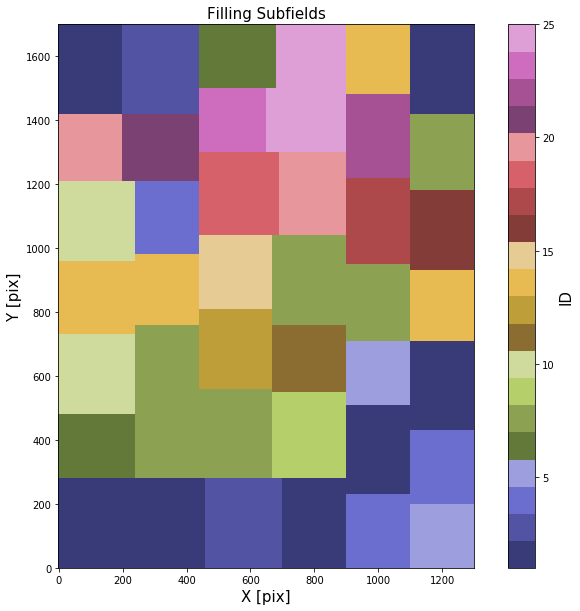

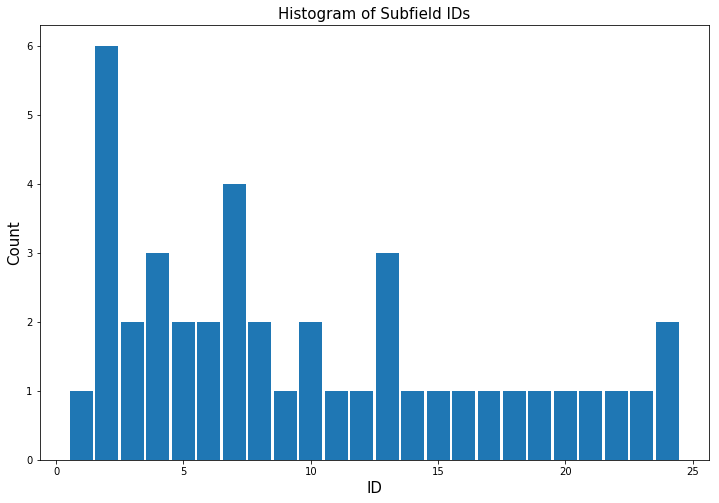

In [2]:
path = '/Users/inchanji/Research/rect_packing/output/NMG_60_45.txt'

data = np.array([line.rstrip('\n').split() for line in open(path)])

subfield = rpmp.rectangles()
Nsubfield = int(data[1][1])
for i in range(Nsubfield):
    subfield.add(int(data[3+i][2]),int(data[3+i][3]))
    

SEQ_SUBFIELD = [ int(num.split(',')[0])-1 for num in data[Nsubfield+4]] 
print 'SEQ_SUBFIELD:', SEQ_SUBFIELD

subfield.maxw_map = int(data[1][3]); subfield.maxh_map = int(data[1][2]);
subfield.save_field()

      
#FIELD, ToGo = rpmp.FILL_RECTS(SEQ_SUBFIELD, subfield)

FIELD = subfield.fieldmap.copy()
FIELD[:,:] = 0; 
Nrow, Ncol = np.shape(subfield.fieldmap)
SEG = np.zeros((Nrow, Ncol), dtype = 'int')
for i in range(len(SEQ_SUBFIELD)):
    node 	= rpmp.find_all_nodes(FIELD)
    y_st 	= node[0][0]; x_st = node[0][1];
    WIDTH 	= node[1][1] - node[0][1] + 1;
    HEIGHT 	= subfield.maxh_map - node[0][0] 
    dy	= subfield.type[SEQ_SUBFIELD[i]][0]; 
    dx 	= subfield.type[SEQ_SUBFIELD[i]][1];
    if (y_st+dy > Nrow) | (x_st+dx > Ncol): print 'warning!!!'
    FIELD[y_st:y_st+dy,x_st:x_st+dx] = subfield.ID[SEQ_SUBFIELD[i]]
    SEG[y_st:y_st+dy,x_st:x_st+dx] += 1

print  np.sum((SEG == 0) | (SEG > 1))
    
plt.figure(figsize=(12,10))
plt.imshow(FIELD,cmap='tab20b', origin='lower',vmin=np.min(FIELD), vmax=np.max(FIELD))
plt.xlabel('X [pix]',fontsize = 15)
plt.ylabel('Y [pix]',fontsize = 15)
plt.title('Filling Subfields',fontsize = 15)
plt.colorbar().set_label(label='ID',size=15)
plt.show()

plt.figure(figsize=(12,8))
plt.hist(np.array(SEQ_SUBFIELD)+0.5, bins = np.arange(subfield.Ntype)+0.5,rwidth = 0.9)
plt.title('Histogram of Subfield IDs',fontsize = 15)
plt.xlabel('ID',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()


initializing global parameters...


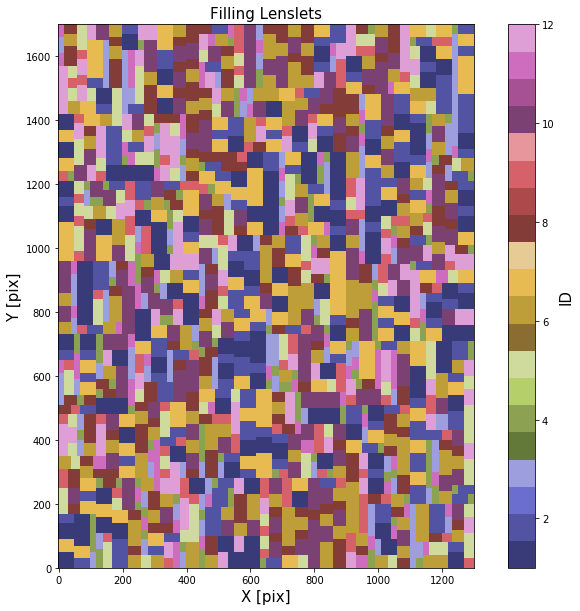

In [3]:
lenslet = rpmp.rectangles()
Nlenslet = int(data[Nsubfield + 6][1])
for i in range(Nlenslet):
    lenslet.add(int(data[Nsubfield+8+i][2]),int(data[Nsubfield+8+i][3]))

#print Nlenslet    
#print lenslet.type    

FIELD2 = np.zeros(np.shape(FIELD))
for i in range(len(SEQ_SUBFIELD)):
#for i in range(1):
    nodes =  rpmp.find_all_nodes(FIELD2)
    origin = nodes[0]
    iSUBFILED = SEQ_SUBFIELD[i]
    #print iSUBFILED, ' fill', subfield.type[iSUBFILED], 'at ',nodes[0]
    lenslet.maxh_map, lenslet.maxw_map = subfield.type[iSUBFILED]
    lenslet.save_field()    
    SEQ_LENSLET = [ int(num.split(',')[0])-1 for num in data[Nsubfield+Nlenslet+9+i]] 
    
    SUBFIELD = np.zeros(np.shape(lenslet.fieldmap), dtype = int)
    #print 'Subfield No. ',i, ' > Size: ', np.shape(lenslet.fieldmap)
    for j in range(len(SEQ_LENSLET)):
        subnodes =  rpmp.find_all_nodes(SUBFIELD)
        dy, dx   =  lenslet.type[SEQ_LENSLET[j]]
        y0sub, x0sub =  subnodes[0]

        y0 = y0sub + nodes[0][0]; x0 = x0sub + nodes[0][1];
        FIELD2[y0:y0+dy, x0:x0+dx]              = lenslet.ID[SEQ_LENSLET[j]]    
        SUBFIELD[y0sub:y0sub+dy,x0sub:x0sub+dx] = lenslet.ID[SEQ_LENSLET[j]]    
        #FIELD2[nodes[0][0]:nodes[0][0]+lenslet.maxh_map,nodes[0][1]:nodes[0][1]+lenslet.maxw_map] = SUBFIELD

    
plt.figure(figsize=(12,10))
plt.imshow(FIELD2,cmap='tab20b', origin='lower',vmin=np.min(FIELD2), vmax=np.max(FIELD2))
#plt.imshow(FIELD2[:300,:300],cmap='tab20b', origin='lower',vmin=np.min(FIELD2), vmax=np.max(FIELD2))
#plt.imshow(SUBFIELD,cmap='tab20b', origin='lower',vmin=np.min(SUBFIELD), vmax=np.max(SUBFIELD))
plt.xlabel('X [pix]',fontsize = 15)
plt.ylabel('Y [pix]',fontsize = 15)
plt.title('Filling Lenslets',fontsize = 15)
plt.colorbar().set_label(label='ID',size=15)
plt.show()


initializing global parameters...
SEQ_SUBFIELD: [0, 1, 2, 1, 3, 4, 3, 1, 5, 6, 7, 8, 1, 9, 4, 6, 10, 11, 6, 12, 13, 12, 7, 14, 15, 16, 9, 3, 17, 18, 6, 19, 20, 21, 22, 23, 1, 2, 1, 12, 5, 24]
25 12
['#', '1', '51']
>  51 lenslets in subfield
>  48 lenslets in subfield
>  46 lenslets in subfield
>  36 lenslets in subfield
>  38 lenslets in subfield
>  31 lenslets in subfield
>  37 lenslets in subfield
>  41 lenslets in subfield
>  35 lenslets in subfield
>  36 lenslets in subfield
>  44 lenslets in subfield
>  47 lenslets in subfield
>  36 lenslets in subfield
>  47 lenslets in subfield
>  33 lenslets in subfield
>  33 lenslets in subfield
>  38 lenslets in subfield
>  38 lenslets in subfield
>  33 lenslets in subfield
>  29 lenslets in subfield
>  38 lenslets in subfield
>  31 lenslets in subfield
>  42 lenslets in subfield
>  36 lenslets in subfield
>  34 lenslets in subfield
>  38 lenslets in subfield
>  42 lenslets in subfield
>  34 lenslets in subfield
>  40 lenslets in subfield
> 

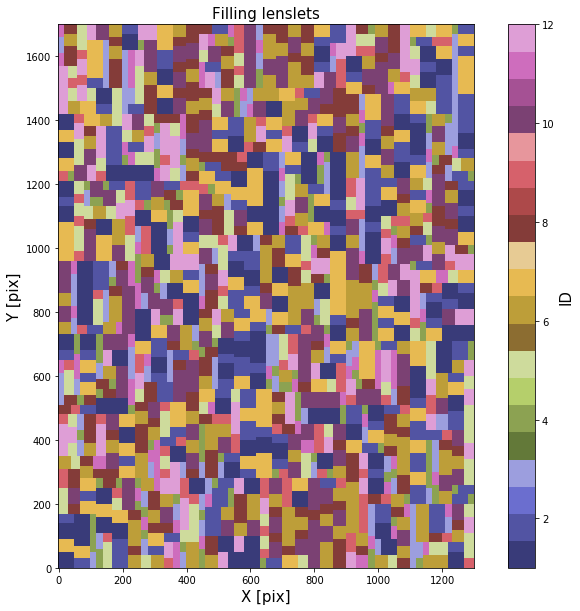

In [18]:
path = '/Users/inchanji/Research/rect_packing/output/NMG_60_45_REARRANGE.txt'
data = np.array([line.rstrip('\n').split() for line in open(path)])
subfield = rpmp.rectangles()
Nsubfield = int(data[1][1])
for i in range(Nsubfield):
    subfield.add(int(data[3+i][2]),int(data[3+i][3]))
    
SEQ_SUBFIELD = [ int(num.split(',')[0])-1 for num in data[Nsubfield+4]] 
print 'SEQ_SUBFIELD:', SEQ_SUBFIELD
Nseq = len(SEQ_SUBFIELD)
subfield.maxw_map = int(data[1][3]); subfield.maxh_map = int(data[1][2]);
subfield.save_field()
FIELD = subfield.fieldmap.copy()

Nlenslet = int(data[Nsubfield + 6][1])
istart = 3 + Nsubfield + 5 + Nlenslet + 1
print Nsubfield, Nlenslet
print data[istart]

for i in range(Nseq):    
    Nlenslets = int(data[istart][2])    
    print '> ', Nlenslets, 'lenslets in subfield'
    istart += 1 
    for j in range(Nlenslets):
        ID   = int(data[istart + j][0]) + 1
        y, x = int(data[istart + j][1]), int(data[istart + j][2]) 
        dy, dx = int(data[istart + j][3]), int(data[istart + j][4])         
        FIELD[y:y+dy,x:x+dx] = ID
        
    istart += Nlenslets
    
plt.figure(figsize=(12,10))
plt.imshow(FIELD,cmap='tab20b', origin='lower',vmin=np.min(FIELD), vmax=np.max(FIELD))
plt.xlabel('X [pix]',fontsize = 15)
plt.ylabel('Y [pix]',fontsize = 15)
plt.title('Filling lenslets',fontsize = 15)
plt.colorbar().set_label(label='ID',size=15)
plt.show()